In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [171]:
tCols = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']

def convert_sex(Sex):
    if Sex == 'male':
        return 1
    else:
        return 0
    
df['Sex'] = df['Sex'].apply(convert_sex)
df['Age'].fillna((df['Age'].mean()), inplace=True)

df_train, df_test = train_test_split(df, test_size=0.3, stratify=df['Survived'], random_state=17)

In [172]:
def test_model(model, dataset, features, targetFeature):
    probs = model.predict_proba(dataset[features])
    conf = pd.Series(map(lambda x: x[1], probs))
    fpr, tpr, thresholds = metrics.roc_curve(dataset[targetFeature], conf, pos_label=1)
    return metrics.auc(fpr, tpr)

In [173]:
gbc = GradientBoostingClassifier(n_estimators=220, learning_rate=0.01)
gbc.fit(df_train[tCols], df_train['Survived'])

test_model(gbc, df_test, tCols, 'Survived')

0.8725507502206532

In [174]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(df_train[tCols], df_train['Survived'])

test_model(dt, df_test, tCols, 'Survived')

0.8385407472786114

In [175]:
forest = RandomForestClassifier(n_estimators=25, random_state = 67)
forest.fit(df_train[tCols], df_train['Survived'])

test_model(forest, df_test, tCols, 'Survived')

0.8624007060900265

In [176]:
lg = LogisticRegression(solver='lbfgs')
lg.fit(df_train[tCols], df_train['Survived'])

test_model(lg, df_test, tCols, 'Survived')

0.8327155045601647

In [177]:
fSet1 = ['Pclass', 'Sex']
fSet2 = ['Sex', 'Age']
fSet3 = ['Pclass', 'Sex', 'Age']
fSet4 = ['Pclass', 'Sex', 'Age', 'Fare']
fSet5 = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']
sets = []
sets.append(fSet1)
sets.append(fSet2)
sets.append(fSet3)
sets.append(fSet4)
sets.append(fSet5)

For Set: PclassSex the best Result:  Gradiant Boosting  with Auroc:  0.8194763165636951
For Set: SexAge the best Result:  Gradiant Boosting  with Auroc:  0.8069137981759341
For Set: PclassSexAge the best Result:  Gradiant Boosting  with Auroc:  0.8519564577817005
For Set: PclassSexAgeFare the best Result:  Gradiant Boosting  with Auroc:  0.8631950573698147
For Set: PclassSexAgeFareSibSpParch the best Result:  Gradiant Boosting  with Auroc:  0.8725507502206532


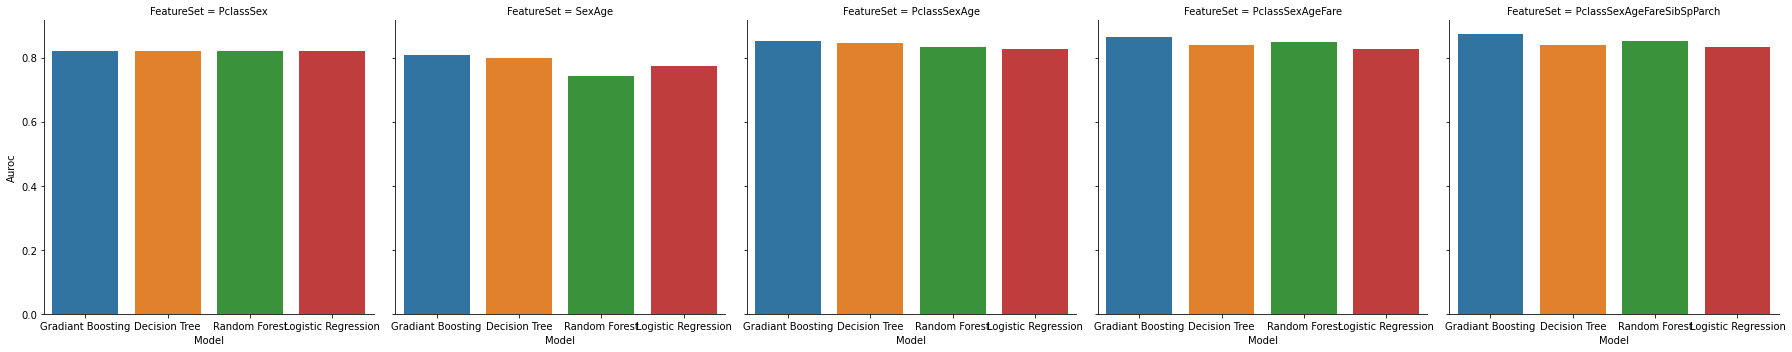

In [178]:
models = pd.DataFrame(columns=['FeatureSet', 'Model', 'Auroc'])

for s in sets:
   results = {}
   
   model1 = GradientBoostingClassifier(n_estimators=220, learning_rate=0.01)
   model1.fit(df_train[s], df_train['Survived'])
   results['Gradiant Boosting'] = test_model(model1, df_test, s, 'Survived')
   models = models.append({'FeatureSet':''.join(s), 'Model':'Gradiant Boosting', 'Auroc': results['Gradiant Boosting']}, ignore_index=True)
   
   model2 = DecisionTreeClassifier(max_depth=3)
   model2.fit(df_train[s], df_train['Survived'])
   results['Decision Tree'] = test_model(model2, df_test, s, 'Survived')
   models = models.append({'FeatureSet':''.join(s), 'Model':'Decision Tree', 'Auroc': results['Decision Tree']}, ignore_index=True)
   
   model3 = RandomForestClassifier(n_estimators=25)
   model3.fit(df_train[s], df_train['Survived'])
   results['Random Forest'] = test_model(model3, df_test, s, 'Survived')
   models = models.append({'FeatureSet':''.join(s), 'Model':'Random Forest', 'Auroc': results['Random Forest']}, ignore_index=True)
   
   model4 = LogisticRegression(solver='lbfgs', max_iter=200)   
   model4.fit(df_train[s], df_train['Survived'])
   results['Logistic Regression'] = test_model(model4, df_test, s, 'Survived')
   models = models.append({'FeatureSet':''.join(s), 'Model':'Logistic Regression', 'Auroc': results['Logistic Regression']}, ignore_index=True)
   
   best = max(results, key=results.get)
   print('For Set:', ''.join(s), 'the best Result: ', best, ' with Auroc: ', results[best])
   
sns.catplot(data=models, x='Model', y='Auroc', col='FeatureSet', kind='bar')

In [179]:
#Altering Features
def convert_age(Age):
    if Age < 11:
        return 0
    elif Age <= 18:
        return 1
    elif Age <= 22:
        return 2
    elif Age <= 27:
        return 3
    elif Age <= 33:
        return 4
    elif Age <= 40:
        return 5
    else:
        return 6

In [180]:
#Altering Features
df['Embarked'] = df['Embarked'].fillna('S')
embarked_dummies = pd.get_dummies(df['Embarked'])
df_prep = df.join(embarked_dummies)

df_prep['NewAge'] = df_prep['Age'].apply(convert_age)

df_train, df_test = train_test_split(df_prep, test_size=0.3, stratify=df['Survived'], random_state=17)

In [181]:
fSet1 = ['Pclass', 'Sex', 'Age']
fSet2 = ['Pclass', 'Sex', 'NewAge']
fSet3 = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']
fSet4 = ['Pclass', 'Sex', 'NewAge', 'Fare', 'SibSp', 'Parch']

sets = []
sets.append(fSet1)
sets.append(fSet2)
sets.append(fSet3)
sets.append(fSet4)

For Set: PclassSexAge the best Result:  Gradiant Boosting  with Auroc:  0.8519564577817005
For Set: PclassSexNewAge the best Result:  Random Forest  with Auroc:  0.8548396587231539
For Set: PclassSexAgeFareSibSpParch the best Result:  Gradiant Boosting  with Auroc:  0.8725507502206532
For Set: PclassSexNewAgeFareSibSpParch the best Result:  Random Forest  with Auroc:  0.8574874963224479


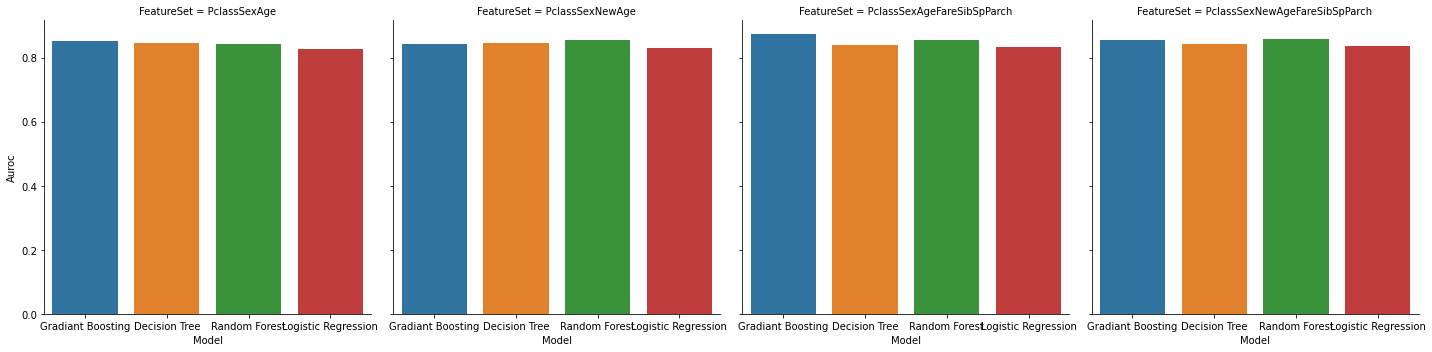

In [182]:
models = pd.DataFrame(columns=['FeatureSet', 'Model', 'Auroc'])

for s in sets:
   results = {}
   
   model1 = GradientBoostingClassifier(n_estimators=220, learning_rate=0.01)
   model1.fit(df_train[s], df_train['Survived'])
   results['Gradiant Boosting'] = test_model(model1, df_test, s, 'Survived')
   models = models.append({'FeatureSet':''.join(s), 'Model':'Gradiant Boosting', 'Auroc': results['Gradiant Boosting']}, ignore_index=True)
   
   model2 = DecisionTreeClassifier(max_depth=3)
   model2.fit(df_train[s], df_train['Survived'])
   results['Decision Tree'] = test_model(model2, df_test, s, 'Survived')
   models = models.append({'FeatureSet':''.join(s), 'Model':'Decision Tree', 'Auroc': results['Decision Tree']}, ignore_index=True)
   
   model3 = RandomForestClassifier(n_estimators=25)
   model3.fit(df_train[s], df_train['Survived'])
   results['Random Forest'] = test_model(model3, df_test, s, 'Survived')
   models = models.append({'FeatureSet':''.join(s), 'Model':'Random Forest', 'Auroc': results['Random Forest']}, ignore_index=True)
   
   model4 = LogisticRegression(solver='lbfgs', max_iter=200)   
   model4.fit(df_train[s], df_train['Survived'])
   results['Logistic Regression'] = test_model(model4, df_test, s, 'Survived')
   models = models.append({'FeatureSet':''.join(s), 'Model':'Logistic Regression', 'Auroc': results['Logistic Regression']}, ignore_index=True)
   
   best = max(results, key=results.get)
   print('For Set:', ''.join(s), 'the best Result: ', best, ' with Auroc: ', results[best])
   
sns.catplot(data=models, x='Model', y='Auroc', col='FeatureSet', kind='bar')